## Dataset : Pima Indians Diabetes Database

This dataset is taken originally from the National Institute of Diabetes, Digestive and Kidney Diseases.

Diabetes is one of the fastest growing chronic life threatening diseases that have already affected 422 million people worldwide according to the report of World Health Organization (WHO), in 2018. Due to the presence of a relatively long asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around 50% of all people suffering from diabetes are undiagnosed because of its long-term asymptomatic phase.

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

There are 768 observations and 8 independent variables in the dataset. The target variable indicates the test result of the patient. It is 1 when the test result is positive and 0 when the test result is negative.

### Objective
To build a machine learning model to accurately predict whether the patients in the dataset have diabetes or not.

In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Loading the dataset
location=("C:\\Users\\krishna meghana\\Downloads\\diabetes.csv")
data = pd.read_csv(location)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("The shape of the data is ",data.shape)

The shape of the data is  (768, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The diabetes dataset contains 768 rows and 9 features including the target variable in which all are numeric in nature. No categorical features exist. But there are some features which can be turned into categorical, like Glucose level, BMI, Age groups.

Outcome is the target variable which has values 0 and 1 indicating whether the patient has diabetes or not.

#### Description of the Attributes:

- Pregnancies --- Number of times pregnant
- Glucose --- The blood plasma glucose concentration after a 2 hour oral glucose tolerance test (mg/dL)
- BloodPressure --- Diastolic blood pressure (mm/Hg)
- SKinThickness --- Skinfold Triceps skin fold thickness (mm)
- Insulin --- 2 Hour serum insulin (mu U/ml)
- BMI --- Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction --- A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
- Age 
- Outcome --- Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no)

The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome)

__describe()__ method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

- count gives the number of non-empty rows in a column.
- mean is the the mean value of that feature.
- std is the Standard Deviation Value of that feature.
- min is the minimum value of that feature.
- 25%, 50%, and 75% are the quartiles which helps us to detect Outliers and understand the distribution of data.
- max gives the maximum value of that feature.

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#Checking for missing values

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Checking for duplicate values

data.duplicated().sum()

0

There are no missing values in the dataset but if we observe the dataset, we can see that lots of features have 0 values. 

For example in BloodPressure, BMI, Glucose, Insulin etc having 0 for those features make no sense like having 0 bloodpressure or BMI etc. 

It appears as if zero was used as a imputer value in original data for missing values. We can treat them as missing and impute with proper values.

It is better to replace zeros with NaN because counting them would be easier and need to be replaced with suitable values.

In [9]:
#Replacing zeroes with Nan value

data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans

print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We can see that the features Glucose, BloodPressure, SkinThickness, Insulin, BMI have missing values.

<AxesSubplot:>

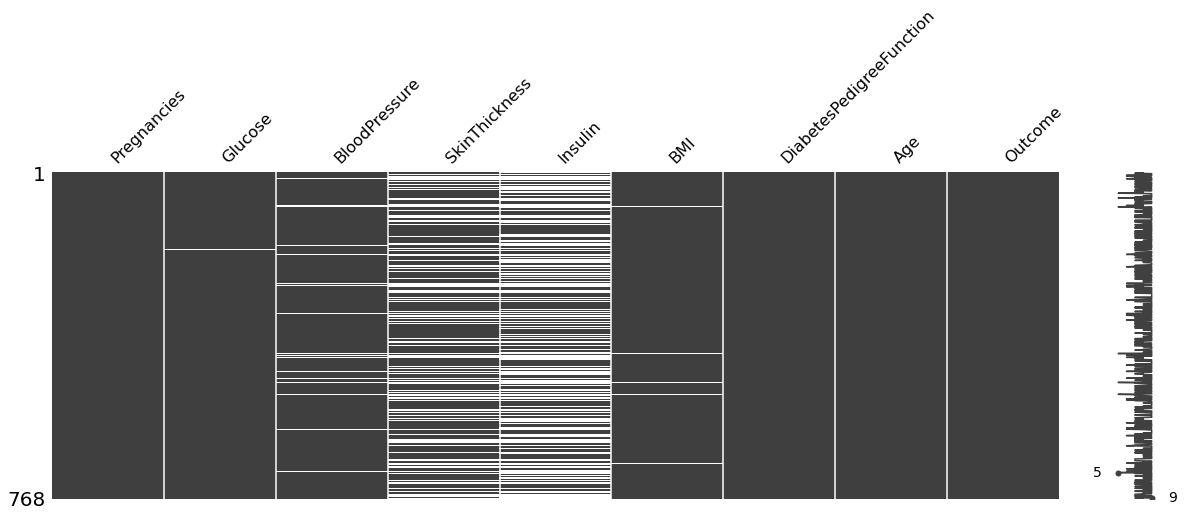

In [10]:
#Viewing the missing values

mno.matrix(data_copy, figsize = (20, 6))

In [11]:
#Percentage of NaNs in each column

round(data_copy.isnull().sum()/len(data_copy)*100,2)

Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64

In [12]:
#For easy access, renaming data_copy as df
df=data_copy

<AxesSubplot:xlabel='BMI', ylabel='Density'>

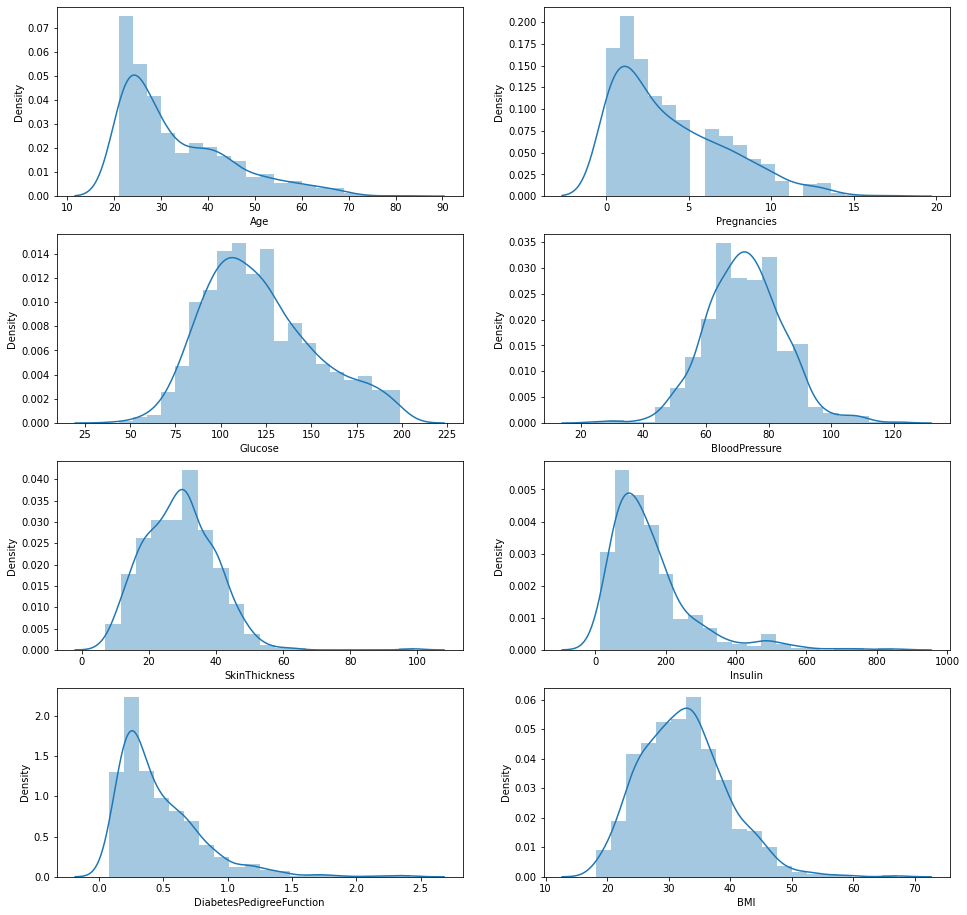

In [13]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

We can say the data is skewed to the right if mean is grater than the median value and vice versa. Such situation is significantly observed for Insulin. The data also seems to have some outliers which can be viewed using boxplot.

#### The plots show that Glucose, Blood Pressure, BMI are normally distributed.  Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.

The missing values can either be imputed with mean or median or any value or they can be deleted from the dataset for further analysis. Here, we are trying to replacae them with mean and median values according to their distribution.

In [14]:
#Checking the skewness of data

df.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

For highly skewed values we'll impute the column with median else mean.

In [15]:
# Highly skewed
df['BMI'].fillna(df['BMI'].median(), inplace = True)
#Normal
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

In [16]:
#Correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


### Heatmap

The heatmap is used to identify correlations of the nullity between each of the different columns.

<AxesSubplot:>

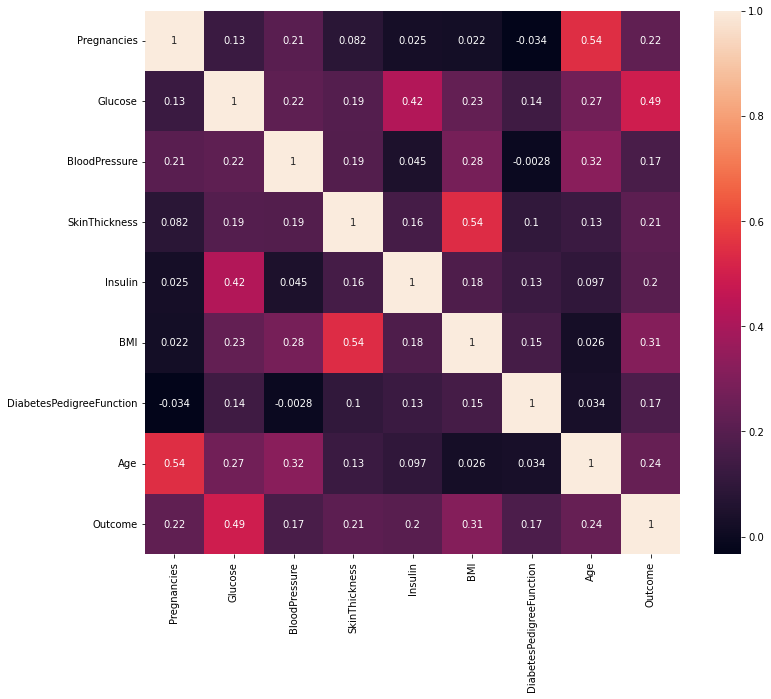

In [17]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

The coefficient can only take values between -1 and 1:
- the closer the value to 1, the higher the positive linear relationship.
- the closer the value to 0, the lower the linear relationship.
- the closer the value to -1, the higher the negative linear relationship.

As we observe there is not much correlation between features except for some values that are approx greater than 0.5 The features are:

Age-Pregnancies : Pregnancies can increase with age and stop after a certain age

Glucose-Diabetes : Higher glucose count has higher probability of being diagnosed with diabetes

Glucose-Insulin : Higher level Glucose means more Insulin

BMI-SkinThickness : Higher the BMI, fatter the person is



In [18]:
#Correlation of features with Outcome

data_copy.corrwith(data_copy['Outcome'],axis = 0).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
dtype: float64

Glucose is the most correlated feature with the target/dependent feature 'Outcome'. Also after Glucose the most correlated ones are Age and BMI.

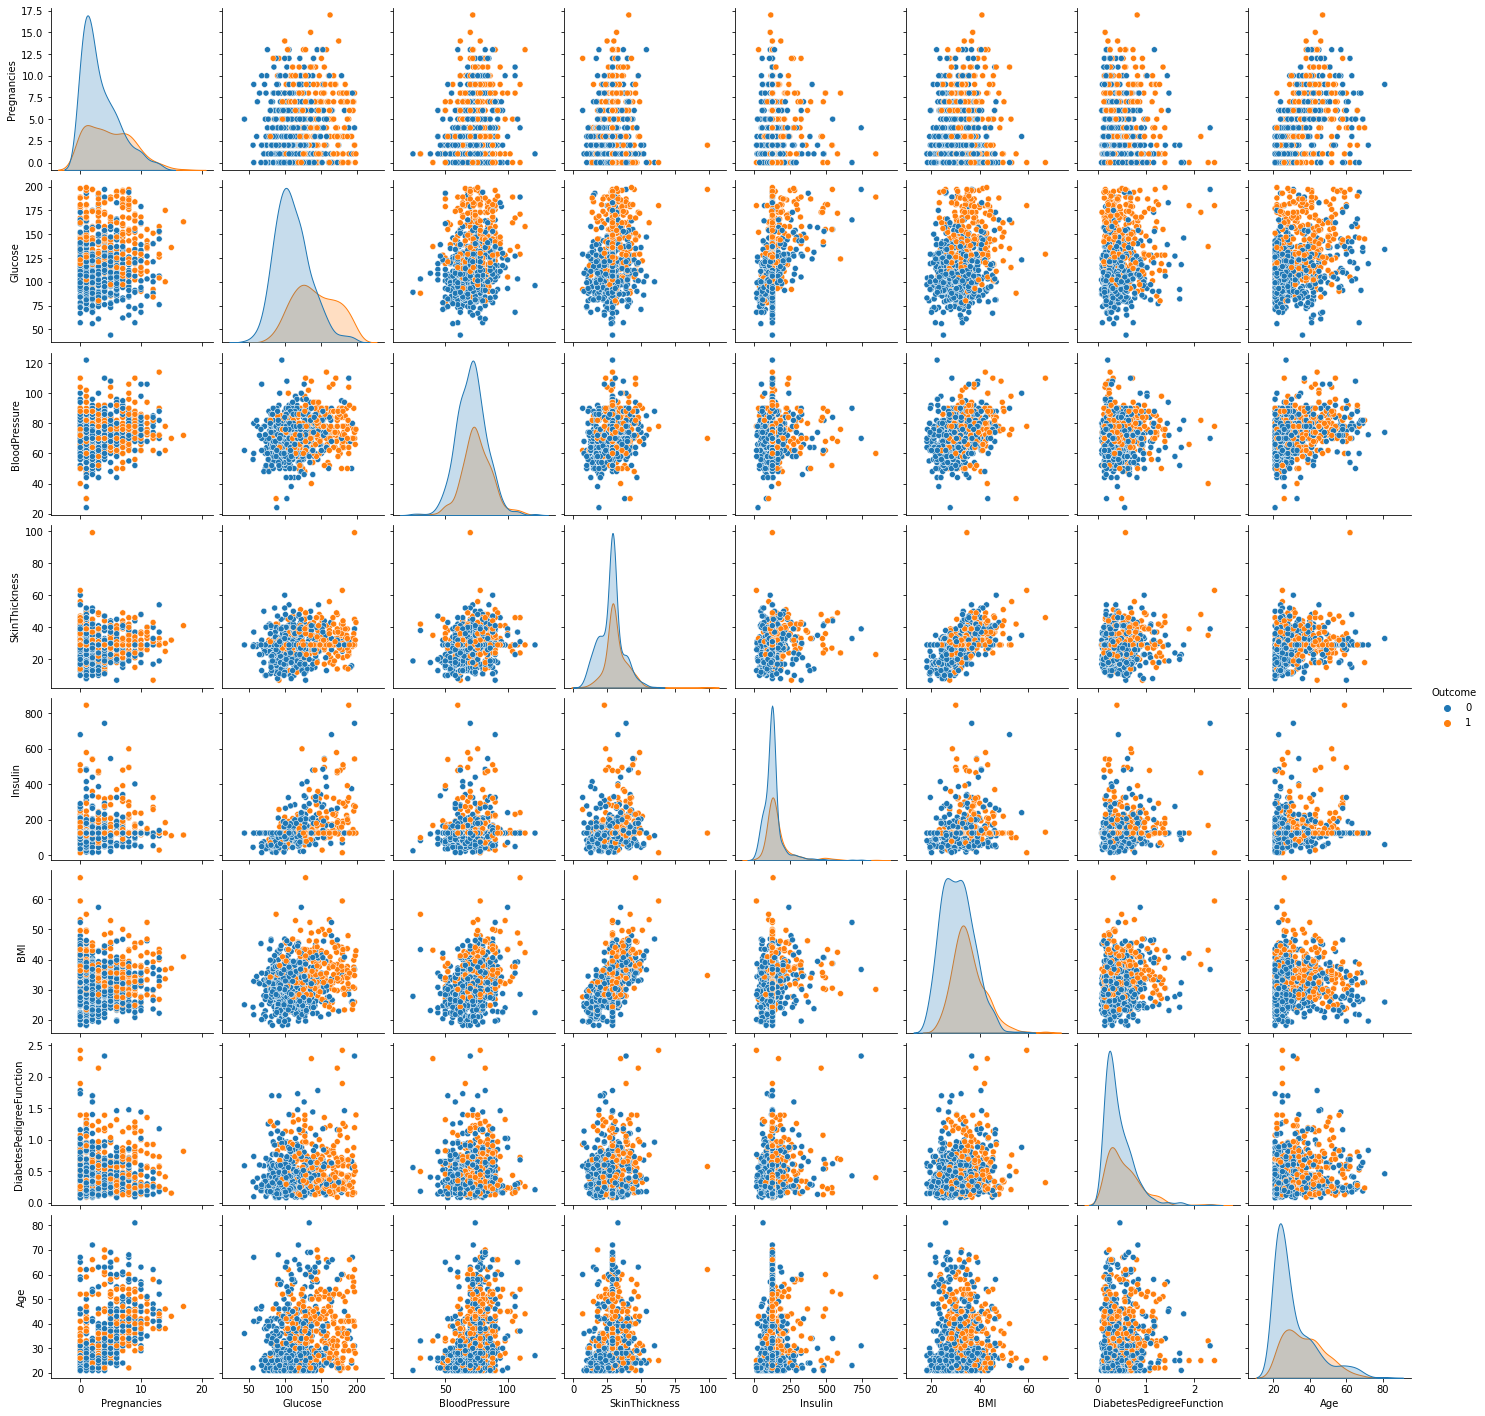

In [19]:
#Pair Plot
sns.pairplot(df,hue='Outcome')

There are no convincing relationship between the parameters. But it can be observed that

- Pregnancies and age have some kind of a linear line.
- BloodPressure and age have little relation. Most of the aged people have BloodPressure.
- Insulin and Glucose have some relation.


In [20]:
#Defining a function to view the distribution plot of each feature with respect to Outcome(diabetic or non-diabetic)

def distplot(col_name):
    plt.figure()
    ax = sns.distplot(df[col_name][df.Outcome == 1], color ="darkturquoise", rug = True)
    sns.distplot(df[col_name][df.Outcome == 0], color ="lightcoral",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])        

### Pregnancies

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

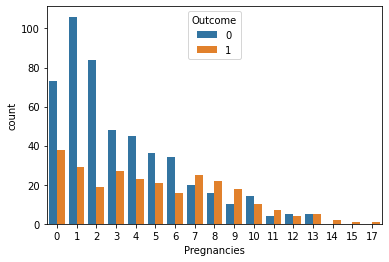

In [21]:
sns.countplot(x="Pregnancies", hue = "Outcome", data=df)

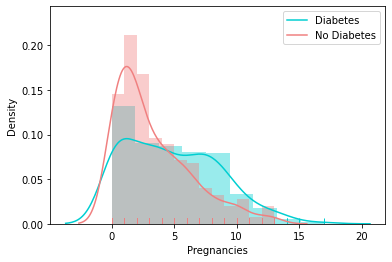

In [22]:
distplot('Pregnancies')

 We can see that the number of pregnancies is high for the diabetic people

### Glucose

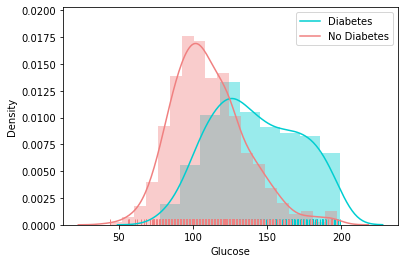

In [23]:
distplot('Glucose')

 Here we can see that the glucose levels of diabetic people is generally high.

### Blood Pressure

<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

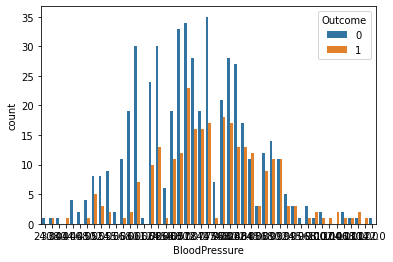

In [24]:
sns.countplot(x="BloodPressure", hue = "Outcome", data=df)

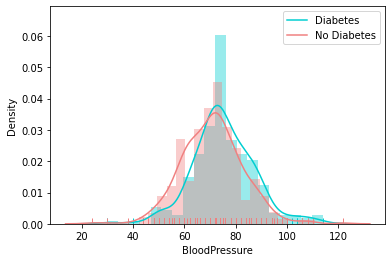

In [25]:
distplot('BloodPressure')

People with high BloodPressure have more chance of diabeties.

### Skin Thickness

<AxesSubplot:xlabel='SkinThickness', ylabel='count'>

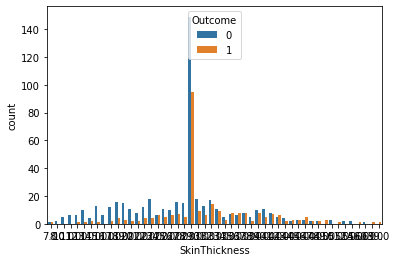

In [26]:
sns.countplot(x="SkinThickness", hue = "Outcome", data=df)

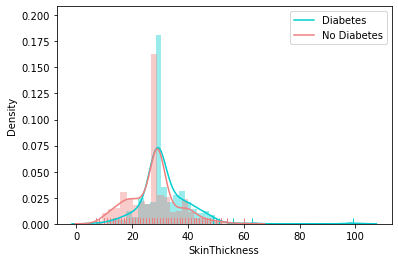

In [27]:
distplot('SkinThickness')

 Here we can see diabetic people have a little more thick skin

### Insulin

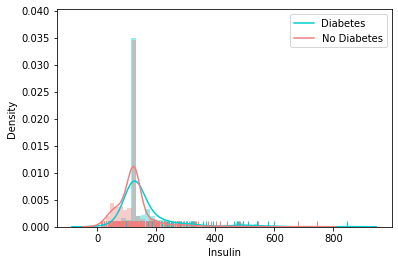

In [28]:
distplot('Insulin')

People with more insulin level tend to have Diabetes

### BMI

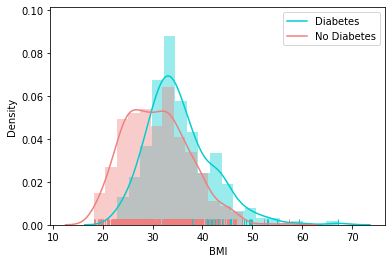

In [29]:
distplot('BMI')

Diabetic people have higher BMI.

### Diabetes Pedigree Function

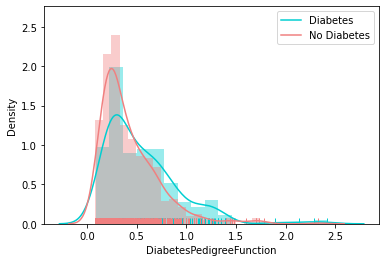

In [30]:
distplot('DiabetesPedigreeFunction')

### Age

<AxesSubplot:xlabel='Age', ylabel='count'>

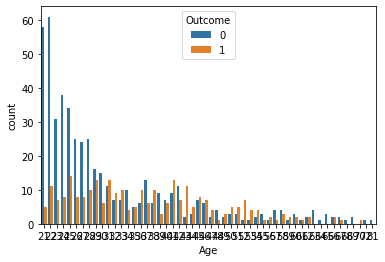

In [31]:
sns.countplot(x="Age", hue = "Outcome", data=df)

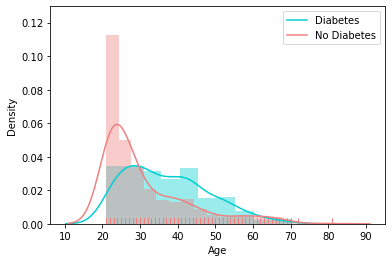

In [32]:
distplot('Age')

 We can see that old people are more diabetic.
 
 The midle aged women are most likely to be diabetic than the young women in the age group of 31-40 and 41-55.

### Bivariate Analysis

#### Insulin and Skin Thickness

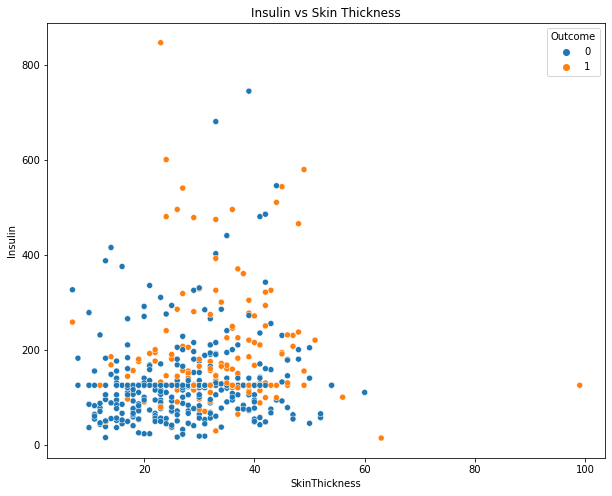

In [33]:
_,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x = df["SkinThickness"],
               y = df["Insulin"],
               hue = df["Outcome"],ax=ax).set_title("Insulin vs Skin Thickness" );

#### Age and BMI

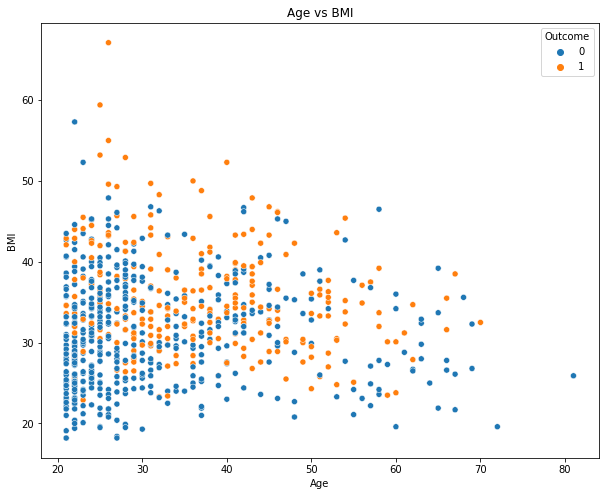

In [34]:
_,ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = df["Age"],
               y = df["BMI"],
               hue = df["Outcome"], ax=ax).set_title("Age vs BMI");

There is not much to infer from this plot

#### BMI and Skin Thickness

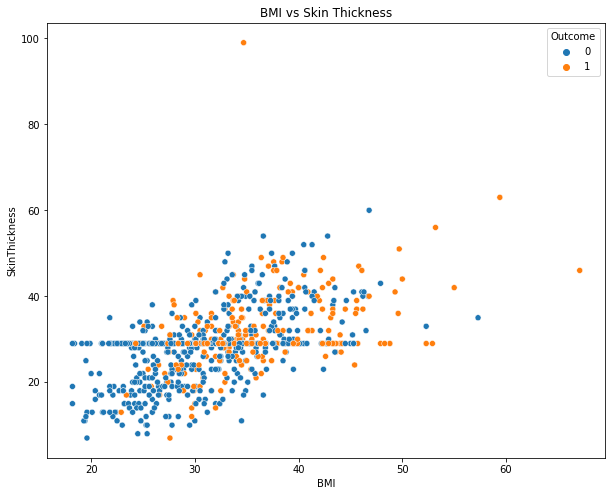

In [35]:
_,ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = df["BMI"],
               y = df["SkinThickness"],
               hue = df["Outcome"], ax=ax).set_title("BMI vs Skin Thickness");

The skin thickness is somewhat related to the outcome, although it is also clearly more related to BMI than outcome.

#### Glucose and Insulin

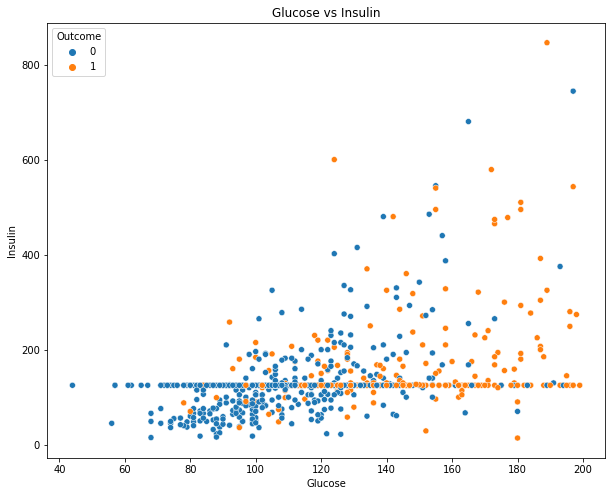

In [36]:
_,ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = df["Glucose"],
               y = df["Insulin"],
               hue = df["Outcome"], ax=ax).set_title("Glucose vs Insulin");

Generally, we can see a upward trend which means higher Glucose level generally indicates higher Insulin level. 

But, at lot 0 Insulin values prompt in the graph. Also, from the graph we can clearly see higher Insulin level indicates Diabetes cases to be True, which in general makes sense.

Truly low glucose is less common than very high. It also appears that the higher the glucose, the more likely it is for the individual to have diabetes. I suspect this is one of the most predictive measures. It is also, however, clearly related to insulin.

#### BMI and Blood Pressure

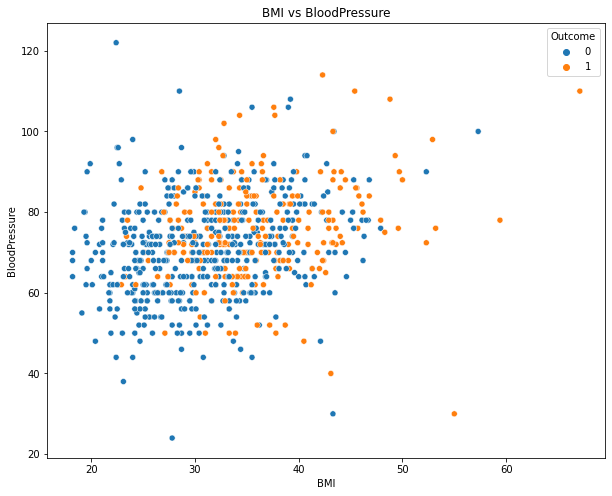

In [37]:
_,ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = df["BMI"],
               y = df["BloodPressure"],
               hue = df["Outcome"], ax=ax).set_title("BMI vs BloodPressure");

The graph is not so clear but there appears to be an upward trend, BloodPressure is increasing with increasing BMI 

### Outcome

In [38]:
print("Number of samples for Outcome 0 are : ",len(data_copy[data_copy['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(data_copy[data_copy['Outcome']==1]))

Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


<AxesSubplot:xlabel='Outcome', ylabel='count'>

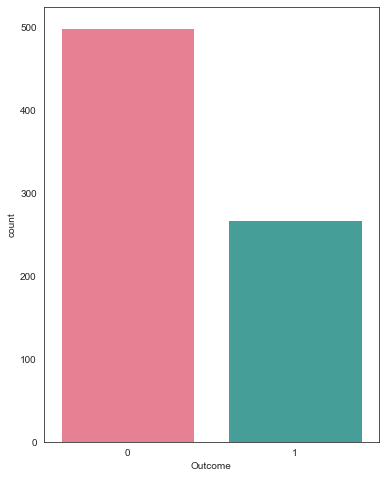

In [39]:
plt.figure(figsize=(6,8))
sns.set_style(style='white')
sns.countplot(data_copy['Outcome'],palette="husl")


The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are diabetic and 34.9% people are healthy.

#### Classes are imbalanced. The Data is biased towards people who are non-diabetics

### Outliers

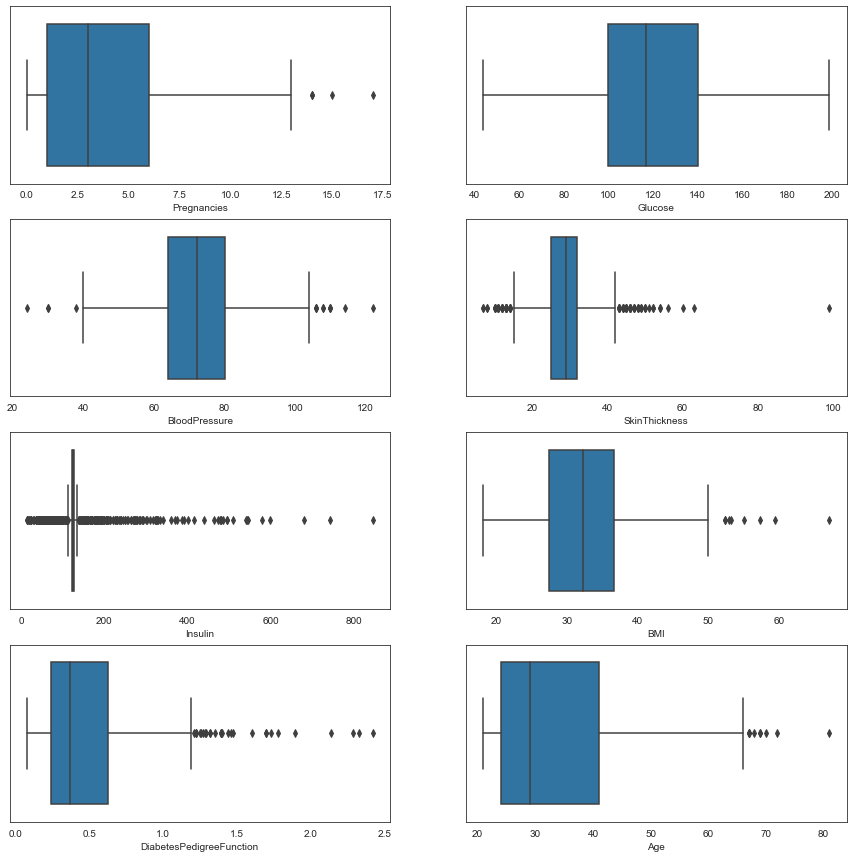

In [40]:
#box plot to visualize the skewness and outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data_copy)
plt.show()

There are some outliers which may interfere with the model building and give inaccurate results. They should be removed from the dataset.

In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.


BloodPressure,SkinThickness,Insulin,BMI have outliers.